# Estimating LAD (Least Absolute Deviations) Regression

In [14]:
using Pkg; Pkg.activate(".")

  Activating project at `~/code/julia/notebooks`


In [15]:
@info "Loading package JuMP"
using JuMP
@info "Loading package HiGHS"
using HiGHS
@info "Loading Plots"
using Plots

[ Info: Loading package JuMP
[ Info: Loading package HiGHS
[ Info: Loading Plots


## Phone Data 

In [16]:
year = collect(50:73)
calls=[4.4, 4.7, 4.7, 5.9, 6.6, 7.3, 8.1, 8.8, 10.6, 12.0, 13.5, 14.9, 16.1, 21.2, 119.0, 124.0,
          142.0, 159.0, 182.0, 212.0, 43.0, 24.0, 27.0, 29.0];

## Scatter Plot

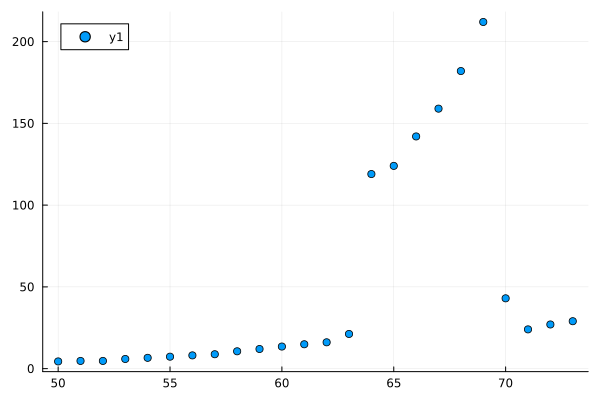

In [17]:
scatter(year, calls)

## Goal Programming Model

$$
\begin{aligned}
\min z & = \sum_{i=1}^{n} d_i^{-} + d_i^{+}\\
\text{subject to:} \\
& y[i] - \beta_0 - \beta_1 x[i] + d_1^{-} - d_1^{+} = 0 \\
& d_i^{-}, d_i^{+} \ge 0 \\
& \beta_0, \beta_1 \in  \mathbb{R} \\
& i = 1, 2, \ldots, n
\end{aligned}
$$

## Creating Model

In [18]:
@info "Creating model"
m = Model(HiGHS.Optimizer)
MOI.set(m, MOI.Silent(), true)

[ Info: Creating model


## Number of observations

In [19]:
n = length(year)
@info "Length" n

┌ Info: Length
└   n = 24


## Creating Decision Variables

In [20]:
@info "Creating variables"
@variable(m, d[1:(2n)])
@variable(m, beta0)
@variable(m, beta1);

[ Info: Creating variables


## Creating objective function

In [21]:
@info "Creating Goal function"
@objective(m, Min, sum(d[i] for i in 1:(2n)))

[ Info: Creating Goal function


d[1] + d[2] + d[3] + d[4] + d[5] + d[6] + d[7] + d[8] + d[9] + d[10] + d[11] + d[12] + d[13] + d[14] + d[15] + d[16] + d[17] + d[18] + d[19] + d[20] + d[21] + d[22] + d[23] + d[24] + d[25] + d[26] + d[27] + d[28] + d[29] + d[30] + d[31] + d[32] + d[33] + d[34] + d[35] + d[36] + d[37] + d[38] + d[39] + d[40] + d[41] + d[42] + d[43] + d[44] + d[45] + d[46] + d[47] + d[48]

## Creating constraints

In [22]:
@info "Creating constraints"
for i in 1:n
    @constraint(m,  calls[i] - beta0 - beta1 * year[i] + d[i] - d[n + i] == 0)
end

[ Info: Creating constraints


In [23]:
@info "Adding sign constraints"
for i in 1:(2n)
    @constraint(m, d[i] >= 0)
end

[ Info: Adding sign constraints


## Solve!

In [24]:
@info "Solving"
optimize!(m)

[ Info: Solving


In [25]:
@info value(beta0)
@info value(beta1)

[ Info: -56.60909090909087
[ Info: 1.172727272727272


## Estimated Regression Model

$$
\hat{y} = -75.18999 + 1.5299 x 
$$

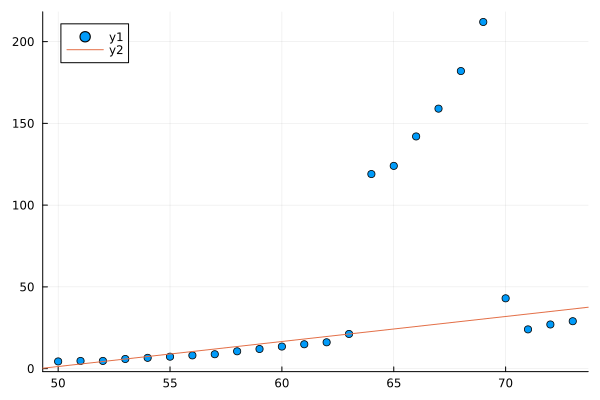

In [26]:
scatter(year,calls)
Plots.abline!(1.5299, -75.18999)

In [27]:
JuMP.latex_formulation(m)

$$ \begin{aligned}
\min\quad & d_{1} + d_{2} + d_{3} + d_{4} + d_{5} + d_{6} + d_{7} + d_{8} + d_{9} + d_{10} + d_{11} + d_{12} + d_{13} + d_{14} + d_{15} + d_{16} + d_{17} + d_{18} + d_{19} + d_{20} + d_{21} + d_{22} + d_{23} + d_{24} + d_{25} + d_{26} + d_{27} + d_{28} + d_{29} + d_{30} + d_{31} + d_{32} + d_{33} + d_{34} + d_{35} + d_{36} + d_{37} + d_{38} + d_{39} + d_{40} + d_{41} + d_{42} + d_{43} + d_{44} + d_{45} + d_{46} + d_{47} + d_{48}\\
\text{Subject to} \quad & d_{1} - d_{25} - beta0 - 50 beta1 = -4.4\\
 & d_{2} - d_{26} - beta0 - 51 beta1 = -4.7\\
 & d_{3} - d_{27} - beta0 - 52 beta1 = -4.7\\
 & d_{4} - d_{28} - beta0 - 53 beta1 = -5.9\\
 & d_{5} - d_{29} - beta0 - 54 beta1 = -6.6\\
 & d_{6} - d_{30} - beta0 - 55 beta1 = -7.3\\
 & d_{7} - d_{31} - beta0 - 56 beta1 = -8.1\\
 & d_{8} - d_{32} - beta0 - 57 beta1 = -8.8\\
 & d_{9} - d_{33} - beta0 - 58 beta1 = -10.6\\
 & d_{10} - d_{34} - beta0 - 59 beta1 = -12\\
 & d_{11} - d_{35} - beta0 - 60 beta1 = -13.5\\
 & d_{12} - d_